<a href="https://colab.research.google.com/github/CotajMahal/Er-Wait-Time-Analysis/blob/main/KaggleERDataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Visit ID                            5000 non-null   object
 1   Patient ID                          5000 non-null   object
 2   Hospital ID                         5000 non-null   object
 3   Hospital Name                       5000 non-null   object
 4   Region                              5000 non-null   object
 5   Visit Date                          5000 non-null   object
 6   Day of Week                         5000 non-null   object
 7   Season                              5000 non-null   object
 8   Time of Day                         5000 non-null   object
 9   Urgency Level                       5000 non-null   object
 10  Nurse-to-Patient Ratio              5000 non-null   int64 
 11  Specialist Availability             5000 non-null   int6

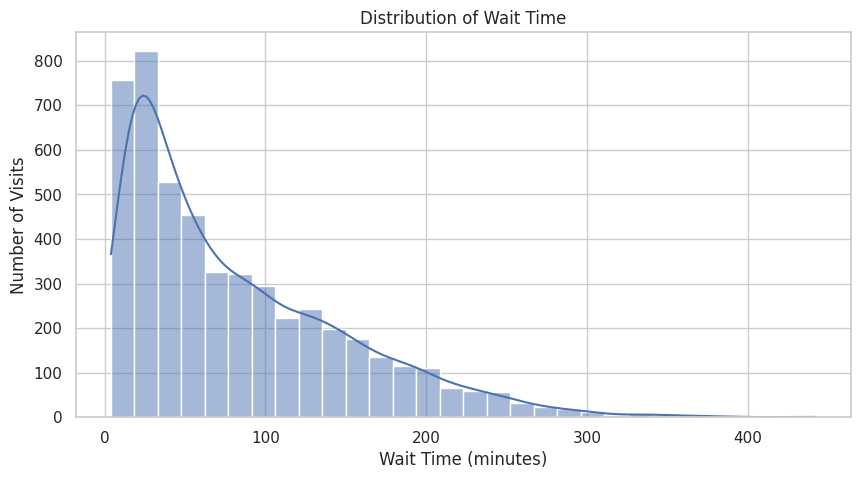

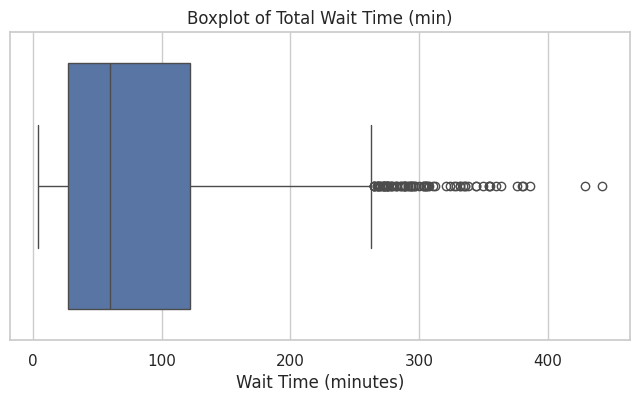

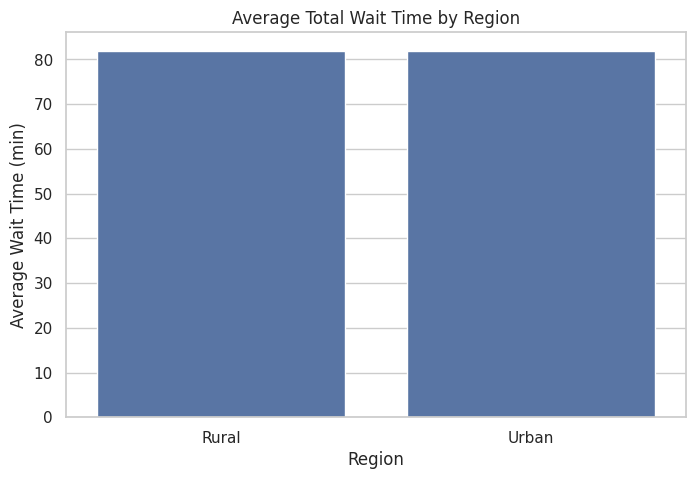

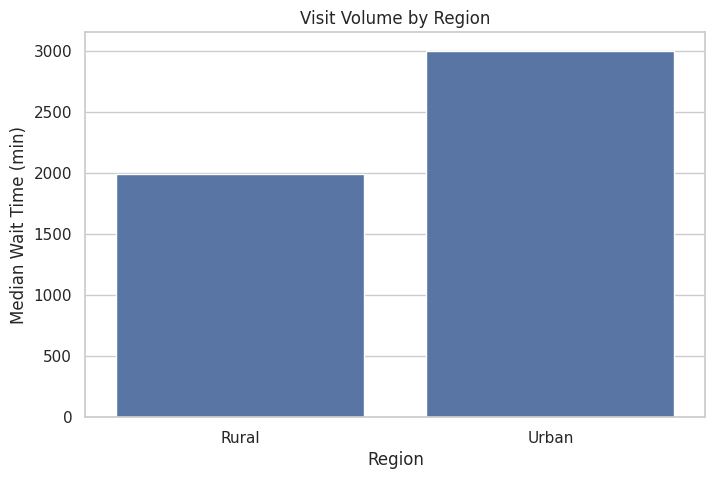

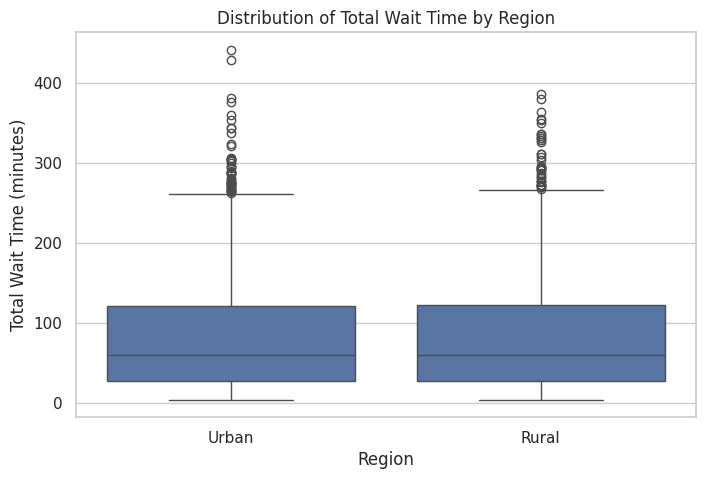

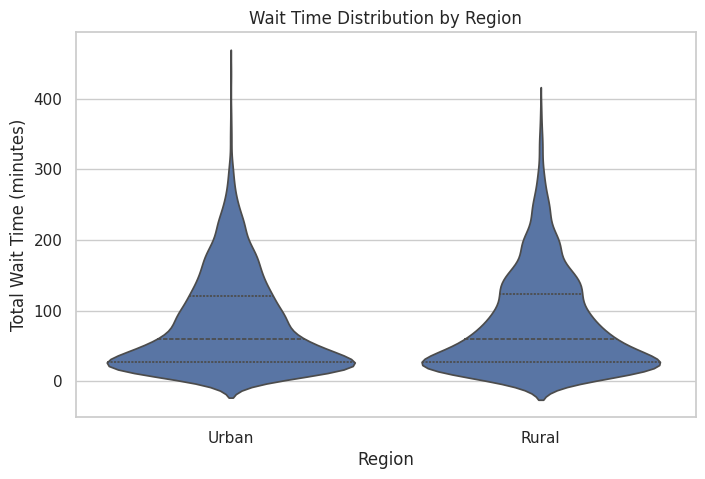

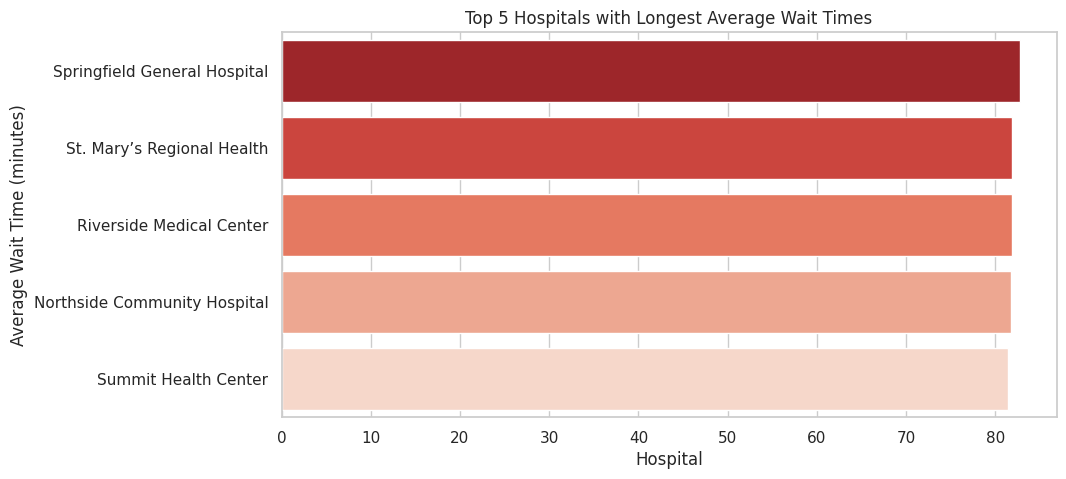

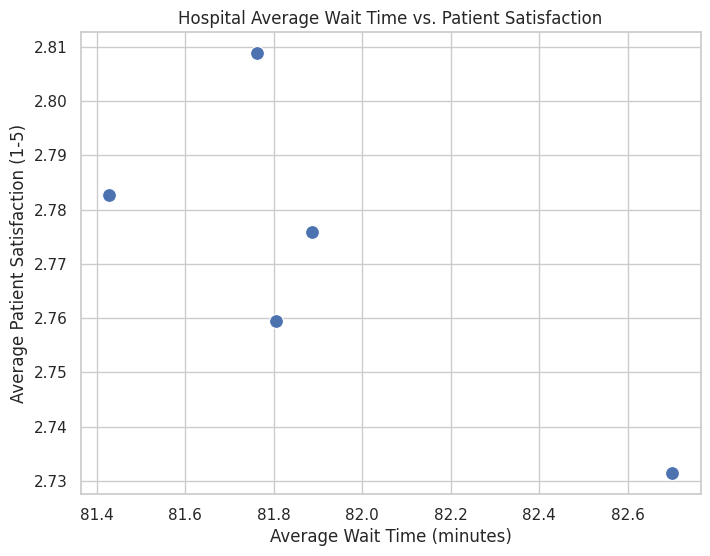

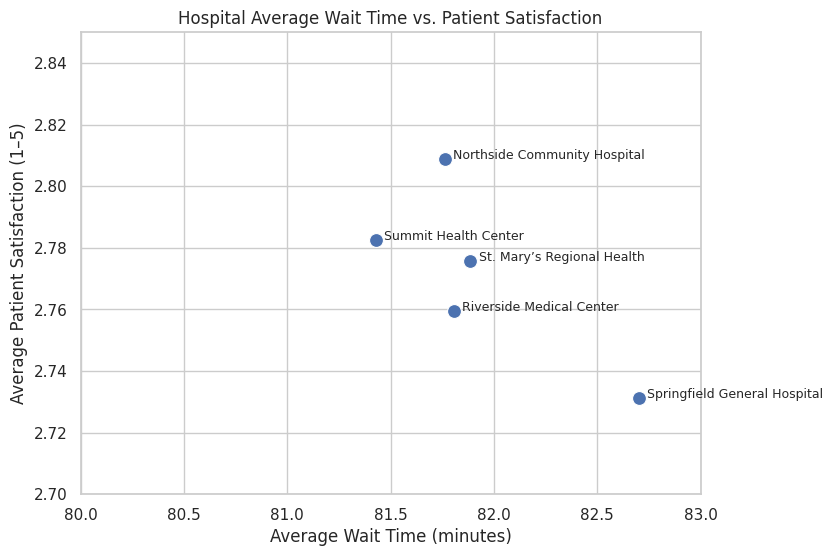

In [46]:


df = pd.read_csv("ER Wait Time Dataset.csv")

df.head()

df.shape
df.info()

df.describe(include='all')

df.isnull().sum()

df['Urgency Level'].value_counts()

df['Region'].value_counts()

df['Patient Outcome'].value_counts()

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.histplot(df['Total Wait Time (min)'], bins=30, kde=True)
plt.title('Distribution of Wait Time')
plt.xlabel('Wait Time (minutes)')
plt.ylabel('Number of Visits')
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Total Wait Time (min)'])
plt.title('Boxplot of Total Wait Time (min)')
plt.xlabel('Wait Time (minutes)')
plt.show()

region_summary = df.groupby('Region')['Total Wait Time (min)'].agg(['count', 'mean', 'median']).reset_index()
region_summary.columns = ['Region', 'Number of Visits', 'Average Wait Time (min)', 'Median Wait Time (min)']
region_summary

plt.figure(figsize=(8, 5))
sns.barplot(x='Region', y='Average Wait Time (min)', data=region_summary)
plt.title('Average Total Wait Time by Region')
plt.ylabel('Average Wait Time (min)')
plt.xlabel('Region')
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(x='Region', y='Number of Visits', data=region_summary)
plt.title('Visit Volume by Region')
plt.ylabel('Median Wait Time (min)')
plt.xlabel('Region')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x='Region', y='Total Wait Time (min)', data=df)
plt.title('Distribution of Total Wait Time by Region')
plt.ylabel('Total Wait Time (minutes)')
plt.xlabel('Region')
plt.show()

plt.figure(figsize=(8, 5))
sns.violinplot(x='Region', y='Total Wait Time (min)', data=df, inner='quartile')
plt.title('Wait Time Distribution by Region')
plt.ylabel('Total Wait Time (minutes)')
plt.xlabel('Region')
plt.show()

hospital_summary = df.groupby('Hospital Name').agg({'Total Wait Time (min)': ['mean', 'median'], 'Patient Satisfaction': 'mean', 'Visit ID': 'count'}).reset_index()

hospital_summary.columns = ['Hospital Name', 'Average Wait Time', 'Median Wait Time', 'Avg Satisfaction', 'Visit Count']
hospital_summary = hospital_summary.sort_values(by='Average Wait Time', ascending=False)
hospital_summary

top5 = hospital_summary.sort_values(by='Average Wait Time', ascending=False).head(5)

plt.figure(figsize=(10, 5))
sns.barplot(x='Average Wait Time', y='Hospital Name', data=top5, palette='Reds_r')
plt.title('Top 5 Hospitals with Longest Average Wait Times')
plt.ylabel('Average Wait Time (minutes)')
plt.xlabel('Hospital')
plt.show()

top5_slow = hospital_summary.sort_values(by='Average Wait Time', ascending=False).head(5)


top5_slow[['Hospital Name', 'Average Wait Time', 'Avg Satisfaction']]

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=hospital_summary,
    x='Average Wait Time',
                y='Avg Satisfaction',
                s=100
                )
plt.title('Hospital Average Wait Time vs. Patient Satisfaction')
plt.xlabel('Average Wait Time (minutes)')
plt.ylabel('Average Patient Satisfaction (1-5)')
plt.legend([],[], frameon=False)
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=top5_slow, x='Average Wait Time', y='Avg Satisfaction', s=100)


for i in range(top5_slow.shape[0]):
    plt.text(
        x=top5_slow['Average Wait Time'].iloc[i] + 0.04,
        y=top5_slow['Avg Satisfaction'].iloc[i],
        s=top5_slow['Hospital Name'].iloc[i],
        fontsize=9
    )

plt.title('Hospital Average Wait Time vs. Patient Satisfaction')
plt.xlabel('Average Wait Time (minutes)')
plt.ylabel('Average Patient Satisfaction (1–5)')
plt.xlim(80, 83)
plt.ylim(2.7, 2.85)
plt.grid(True)
plt.show()


df.to_csv('cleaned_emergency_department_data.csv', index=False)




# **Objective:**

[View the Tableau Dashboard Here]
(https://public.tableau.com/views/ERWaitTimeAnalysis/ERWorksheet2?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link)

To analyze emergency department visit data in order to understand how hospital characteristics and operational factors impact patient wait times and satisfaction. The project investigates trends by region, identifies high- and low-performing hospitals, and visualizes relationships between wait time and satisfaction.

# **Dataset: **

Source: Kaggle (Simulated Emergency Department Visits)

5,000 visits across 5 hospitals

Key fields include:

Region (Urban/Rural)

Time to registration, triage, and physician

Total wait time (min)

Urgency level

Facility size, nurse/patient ratio

Patient satisfaction (1–5 scale)


# **Key Insights:**

Wait Time Distribution: Majority of patients are seen in under 60 minutes, but significant outliers reach over 400 minutes.

Urban vs Rural: Surprisingly similar average wait times, but urban hospitals have more outliers and variability.

Hospital Performance:

Springfield General Hospital has the highest average wait time and lowest satisfaction.

Northside Community Hospital maintains high satisfaction despite being in the top 5 for wait time — a potential best-practice model.

Wait Time vs Satisfaction: A mild negative trend exists — longer waits can reduce satisfaction, but other factors likely influence patient perception.

# **Visuals Created**

Histograms, boxplots, and violin plots of wait time distribution

Grouped bar charts by region and hospital

Labeled scatterplot of satisfaction vs wait time

Rankings of top- and bottom-performing hospitals

# **Tools Used**

Google Colab (Python, Pandas, Seaborn, Matplotlib)

Tableau (planned extension)

GitHub (for version control and publishing)